**This is the second phase of our project which consists of exploring several methods to determine whether certain characteristics or features can be used to predict whether an applicant defaults or pays his loan. Then we will use machine learning technics to develop a model to predict credit default.  

In this phase, we will focus only the analysis of the individual feature patterns by using visualization and stastical technicques such as :

_Analyzing Individual Feature Patterns using Visualization_
_Descriptive Statistical Analysis_
_Basics of Grouping_
_Correlation and Causation_
_ANOVA_


The data come from : http://www.creditriskanalytics.net/datasets-private2.html The data set HMEQ reports characteristics and delinquency information for 5,960 home equity loans. A home equity loan is a loan where the obligor uses the equity of his or her home as the underlying collateral.

In [64]:
import numpy as np
import pandas as pd

# Let's import clean data
#url = 'http://www.creditriskanalytics.net/uploads/1/9/5/1/19511601/hmeq.csv'
df = pd.read_csv('clean_Nonildata.csv')
#df = pd.read_csv(url)
df.head()


,Unnamed: 0,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915
1,1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915
2,2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915
3,3,1,1500,73760.8172,101776.048741,DebtCon,Other,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
4,4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915


In [65]:
# Remove df[["Unnamed: 0"]]
df.drop(df[["Unnamed: 0"]], axis = 1, inplace=True)
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,42481.395689,56843.931566,7.239301,0.794198,1.071002,83.563059,1.653046,9.948280,7.632713
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,48139.000000,66489.500000,3.000000,0.000000,0.000000,117.371430,0.000000,15.000000,30.763159
50%,0.000000,16300.000000,69529.000000,90000.000000,8.000000,0.000000,0.000000,178.076005,1.000000,21.000000,33.779915
75%,0.000000,23300.000000,88200.250000,119004.750000,12.000000,0.000000,0.449442,227.143058,2.000000,26.000000,37.949892
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [66]:
#First lets only use numeric data
#df=df._get_numeric_data()
#df.head()

# Analyzing Individual Feature Patterns using Visualization

In [67]:
#Let's import the visualization packages "Matplotlib" and "Seaborn"
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [68]:
#Find the variable types in order to choose the most relevant visualisation method
df.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [69]:
df.corr()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.000000,-0.075099,-0.046034,-0.028852,-0.058314,0.264068,0.341472,-0.165113,0.168851,-0.004067,0.124324
LOAN,-0.075099,1.000000,0.216100,0.331862,0.100664,-0.001256,-0.033879,0.086874,0.043160,0.071804,0.074823
MORTDUE,-0.046034,0.216100,1.000000,0.779787,-0.082856,-0.044358,-0.000974,0.130757,0.029480,0.305288,0.128326
VALUE,-0.028852,0.331862,0.779787,1.000000,0.007382,-0.044744,-0.013521,0.167938,-0.004216,0.264037,0.115796
YOJ,-0.058314,0.100664,-0.082856,0.007382,1.000000,-0.059263,0.037314,0.190937,-0.067898,0.024023,-0.047642
DEROG,0.264068,-0.001256,-0.044358,-0.044744,-0.059263,1.000000,0.184901,-0.077468,0.155494,0.057948,0.011194
DELINQ,0.341472,-0.033879,-0.000974,-0.013521,0.037314,0.184901,1.000000,0.021810,0.064407,0.159105,0.029939
CLAGE,-0.165113,0.086874,0.130757,0.167938,0.190937,-0.077468,0.021810,1.000000,-0.110091,0.231595,-0.038052
NINQ,0.168851,0.043160,0.029480,-0.004216,-0.067898,0.155494,0.064407,-0.110091,1.000000,0.085148,0.109212
CLNO,-0.004067,0.071804,0.305288,0.264037,0.024023,0.057948,0.159105,0.231595,0.085148,1.000000,0.157885


In [70]:
df[['BAD','MORTDUE','DEROG', 'VALUE', 'DELINQ']].corr()

,BAD,MORTDUE,DEROG,VALUE,DELINQ
BAD,1.000000,-0.046034,0.264068,-0.028852,0.341472
MORTDUE,-0.046034,1.000000,-0.044358,0.779787,-0.000974
DEROG,0.264068,-0.044358,1.000000,-0.044744,0.184901
VALUE,-0.028852,0.779787,-0.044744,1.000000,-0.013521
DELINQ,0.341472,-0.000974,0.184901,-0.013521,1.000000


 _Linear Relationship_ :  Let's use "regplot", which plots the scatterplot plus the fitted regression line for the data in order to understand whether is there linear relationship between the variables.

In [71]:
#let's install seaborn

! pip install seaborn

(0.0, 2.4374494861108875)

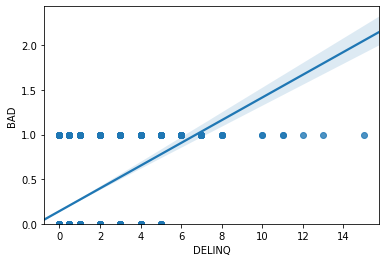

In [72]:
# DELINQ size as potential predictor variable of default
sns.regplot(x="DELINQ", y="BAD", data=df)
plt.ylim(0,)

There seems to be a weak and moderate linear relationship between the continuous variables and the BAD debt. Let's look at now the relationship between BAD debt and categorical variables, i.e variables that describe the 'characteristic' of the data

<AxesSubplot:xlabel='REASON', ylabel='BAD'>

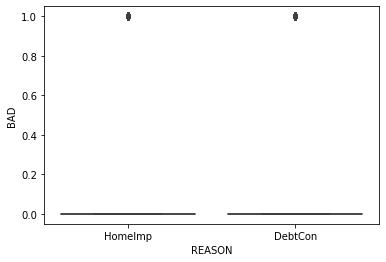

In [73]:
# First, let's look at REASON and JOB
sns.boxplot(x="REASON", y="BAD", data=df)


We see that the distributions of BAD debt between the 2 'REASON' categories has a significant overlap, and so 'REASON' would not be a good predictor of default.. Let's examine engine "JOB" and "BAD":

<AxesSubplot:xlabel='JOB', ylabel='BAD'>

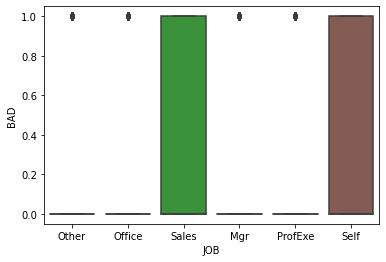

In [74]:
sns.boxplot(x="JOB", y="BAD", data=df)

Here we see that the distribution of BAD debt between the different ' JOB' categories are distinct enough to take 'JOB' as a potential good predictor of default

In [75]:
df['JOB'].value_counts()

Other      2667
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64

In [76]:
# Convert the series into dataframe
df['JOB'].value_counts().to_frame()

,JOB
Other,2667
ProfExe,1276
Office,948
Mgr,767
Self,193
Sales,109


In [77]:
# Repeating the above steps but save the results to the dataframe "JOB_counts" and rename the column 'JOB' to 'value_counts'.
JOB_counts = df['JOB'].value_counts().to_frame()
JOB_counts.rename(columns={'JOB': 'value_counts'}, inplace=True)
JOB_counts

,value_counts
Other,2667
ProfExe,1276
Office,948
Mgr,767
Self,193
Sales,109


In [78]:
# Renaming the index to 'JOB'
JOB_counts.index.name = 'JOB'
JOB_counts

,value_counts
JOB,
Other,2667
ProfExe,1276
Office,948
Mgr,767
Self,193
Sales,109


The value counts for JOB would not be a good predictor variable for the default, as most of the values are concentrated across "Other" and "ProfExe", this result is skewed. As such, no meaningful conclusion be drawn for "JOB"

In [79]:
df['REASON'].value_counts()

DebtCon    4180
HomeImp    1780
Name: REASON, dtype: int64

## Group the data by one or/and multiple features in order refine the data exploration

In [80]:
df['JOB'].unique()

array(['Other', 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self'], dtype=object)

In [81]:
# Determine which type of JOB category is, on average, more unlikely to lead to lead to default
df_group_one = df[['JOB', 'REASON', 'BAD']]
df_group_one = df_group_one.groupby(['JOB','REASON'], as_index = False).mean()
df_group_one

,JOB,REASON,BAD
0,Mgr,DebtCon,0.207420
1,Mgr,HomeImp,0.321839
2,Office,DebtCon,0.142195
3,Office,HomeImp,0.109635
4,Other,DebtCon,0.194298
5,Other,HomeImp,0.270375
6,ProfExe,DebtCon,0.159587
7,ProfExe,HomeImp,0.180247
8,Sales,DebtCon,0.350515
9,Sales,HomeImp,0.333333


In [82]:
#Using a pivot table in order to have a better of the grouping data
grouped_pivot = df_group_one.pivot(index='JOB',columns='REASON')
grouped_pivot

BAD          
REASON    DebtCon   HomeImp
JOB                        
Mgr      0.207420  0.321839
Office   0.142195  0.109635
Other    0.194298  0.270375
ProfExe  0.159587  0.180247
Sales    0.350515  0.333333
Self     0.474359  0.182609

## Use pyplot in order to visualise the grouping data. This will allow to use a hitmap to plot our target (BAD) proportional the other 2 variables , JOB and REASON

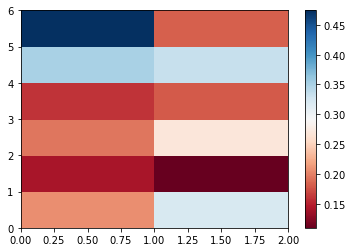

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

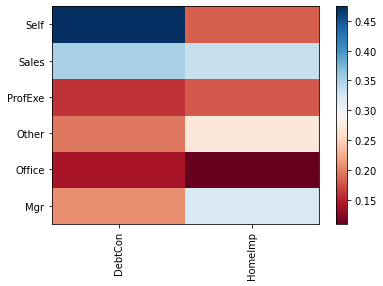

In [84]:
# In order to a much better view between our target and the predictor, let's change the default labels from the above hitmap
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## _PEARSON_ : Let's use a pearson correlation in order to determine the main characteristics which have the most important impact on the default

In [85]:
# First, let's import the stats module from the scipy library
from scipy import stats

In [86]:
#LOAN VALUE
pearson_coef, p_value = stats.pearsonr(df['LOAN'], df['BAD'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.07509892031078531  with a P-value of P = 6.44827329786111e-09


_Conclusion_:
Since the p-value is  <  0.001, the correlation between LOAN and BAD is statistically significant, although the linear relationship is very weak (-0.07)

In [87]:
# HOUSE VALUE

pearson_coef, p_value = stats.pearsonr(df['VALUE'], df['BAD'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.02885191524533157  with a P-value of P = 0.0259209388748943


In [88]:
# DELINQ VALUE

pearson_coef, p_value = stats.pearsonr(df['DELINQ'], df['BAD'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.3414718985742553  with a P-value of P = 1.1991346607440637e-162


## _Other Option_ : Let's use the Pandas method corr() to find the feature other than 'BAD' that is most correlated with 'BAD'.

In [89]:
df.corr()['BAD'].sort_values()

CLAGE     -0.165113
LOAN      -0.075099
YOJ       -0.058314
MORTDUE   -0.046034
VALUE     -0.028852
CLNO      -0.004067
DEBTINC    0.124324
NINQ       0.168851
DEROG      0.264068
DELINQ     0.341472
BAD        1.000000
Name: BAD, dtype: float64

In [90]:
df[['LOAN', 'BAD']].corr()

,LOAN,BAD
LOAN,1.000000,-0.075099
BAD,-0.075099,1.000000


## _ANOVA_: The Analysis of Variance(ANOVA) analyzes the difference between different groups of the same variable,in this context JOB. Implementing the Analysis of Variance  to test whether there are significant differences between the means of the different 'JOB' categories.

F-test score: ANOVA assumes the means of all groups are the same. F-test score calculates how much the actual means of teh different categories of'JOB' deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant is our calculated score value

In [91]:
# First, Let's see if different types 'JOB' impact default or not (BAD)', we group the data.
df_group_job = df[['JOB','BAD']]
group_jobresult=df_group_job[['JOB', 'BAD']].groupby(['JOB'])
group_jobresult.head(2)

,JOB,BAD
0,Other,1
1,Other,1
4,Office,0
9,Sales,1
11,Office,1
13,Mgr,0
16,Mgr,1
21,ProfExe,1
29,Self,0
30,ProfExe,0


In [92]:
# We can obtain the values of the method group using the method "get_group".
group_jobresult.get_group('ProfExe')['BAD']

21      1
30      0
33      1
46      1
53      1
       ..
5901    0
5902    0
5903    0
5904    1
5912    1
Name: BAD, Length: 1276, dtype: int64

_Calculate the F-test score and P-value by using the 'f_oneway' from the module'stats'_.

In [93]:
# ANOVA
f_val, p_val = stats.f_oneway(group_jobresult.get_group('ProfExe')['BAD'], group_jobresult.get_group('Sales')['BAD'], group_jobresult.get_group('Self')['BAD'],group_jobresult.get_group('Mgr')['BAD'],group_jobresult.get_group('Office')['BAD'],group_jobresult.get_group('Other')['BAD'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 14.933104205933965 , P = 1.3532727661491343e-14


This is not a great result, with a small F test score showing a weak correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean that the correlation is weak for all six tested groups? To answer this question, let's analyse separately other groups

In [94]:
# ANOVA
f_val, p_val = stats.f_oneway(group_jobresult.get_group('ProfExe')['BAD'], group_jobresult.get_group('Sales')['BAD'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 22.9477104735582 , P = 1.8438965498717681e-06


In [95]:
# ANOVA
f_val, p_val = stats.f_oneway(group_jobresult.get_group('Mgr')['BAD'],group_jobresult.get_group('Office')['BAD'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 30.459327020374808 , P = 3.931619659811407e-08


In [96]:
# ANOVA
f_val, p_val = stats.f_oneway(group_jobresult.get_group('Office')['BAD'],group_jobresult.get_group('Other')['BAD'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 32.173412834457544 , P = 1.5207763874824095e-08


Conclusion: Important Variables
We now have a better idea of what our data looks like and which variables are important to take into account when predicting default. We have narrowed it down to the following variables:

Continuous numerical variables:

...
...
....
...
Categorical variables:

......